# Explorative Analyse

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import networkx as nx

import pickle

In [2]:
G = nx.read_gml('../data/final/trips.gml')
trips = pd.read_pickle('../data/intermediate/trips.pickle')

In [3]:
print(nx.info(G))
print('Density: {}'.format(nx.density(G)))
print('Loops: {}'.format(len(list(G.selfloop_edges()))))
print('Average Duration: {} minutes'.format((trips['Duration'] / 60).mean()))
print('Unique BikeId: {}'.format(len(trips['BikeId'].unique())))

Name: 
Type: MultiDiGraph
Number of nodes: 782
Number of edges: 1029716
Average in degree: 1316.7724
Average out degree: 1316.7724
Density: 1.6860081671147555
Loops: 49064
Average Duration: 21.629531970365388 minutes
Unique BikeId: 10713


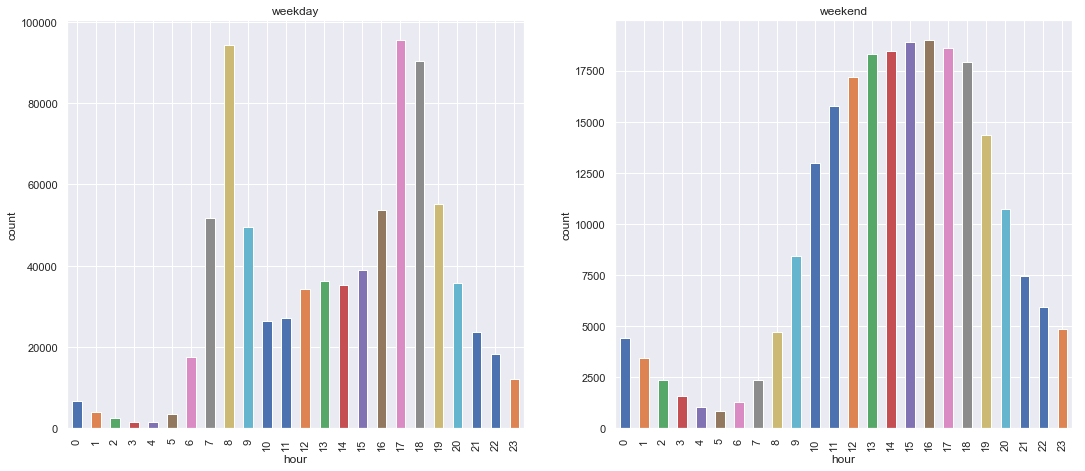

In [4]:
weekend_trips = trips[(trips['StartDate'].dt.weekday_name == 'Saturday') | (trips['StartDate'].dt.weekday_name=='Sunday')]
weekday_trips = trips[~trips.index.isin(weekend_trips.index)]
plt.subplots(1, 2, figsize=(18, 7.5))
plt.subplot(1, 2, 1)
weekday_trips.groupby(weekday_trips['StartDate'].dt.hour)['RentalId'].count().plot.bar(title='weekday')
plt.xlabel('hour')
plt.ylabel('count')
plt.subplot(1, 2, 2)
weekend_trips.groupby(weekend_trips['StartDate'].dt.hour)['RentalId'].count().plot.bar(title='weekend')
plt.xlabel('hour')
plt.ylabel('count')
plt.savefig('img/trips_per_hour.pdf')

In [5]:
manual_transports = pd.DataFrame()

for bike in trips['BikeId'].unique():
    one_bike = trips[trips['BikeId'] == bike].sort_values('StartDate')
    one_bike[['last_end_station_id', 'last_end_date']] = one_bike.shift(1)[['EndStationId', 'EndDate']]
    one_bike = one_bike.dropna()
    
    manual = one_bike[one_bike['StartStationId'] != one_bike['last_end_station_id']]
    manual = manual[['last_end_date', 'last_end_station_id', 'StartDate', 'StartStationId']]
    manual = manual.rename(
        columns={
            'last_end_date': 'start_date',
            'last_end_station_id': 'start_id',
            'Start Date': 'end_date',
            'StartStation Id': 'end_id'
        }
    )

    manual_transports = manual_transports.append(manual)

In [6]:
print('Magical Transports: {}'.format(len(manual_transports)))

Magical Transports: 76270


In [7]:
with open('../data/intermediate/distance_lookup.pickle', 'rb') as file:
    distance_lookup = pickle.load(file)

observed_distances = []
for i in G.edges:
    observed_distances.append(distance_lookup[(int(i[0]), int(i[1]))])

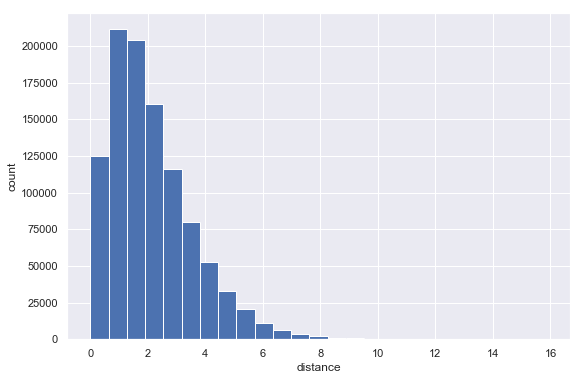

In [8]:
plt.figure(figsize=(9, 6))
plt.hist(observed_distances, bins=25)
plt.xlabel('distance')
plt.ylabel('count')
plt.savefig('img/distances.pdf')

In [9]:
print('mean: {}'.format(np.mean(observed_distances)))
print('var: {}'.format(np.var(observed_distances)))

mean: 2.119215254219517
var: 2.223932187115836
